blacklist / whitelist

### Opt-out (blacklist 방식) : 상대방이 명시적으로 거부할 때만 정보수집 중단

In [1]:
# 서버쪽으로 Request 제공. 
# but, 대부분의 사이트는 가입된 회원에 관해 한정된 정보를 제공.
# Bot -> 적당한 트래픽, 적당한 Request를 가지게 만들어야 한다.

In [2]:
# 개인정보 : (로그인한 사람들만) DB에 저장됨.
# 지적재산권 : (DB에 있는 것은 소유물, 창작물로서 인정을 받는다. 따라서 DB에서 함부로 갖고오면 안된다.)
# 이용방침 : "우리 사이트에는 오지 마세요. 이거 가져가지 마세요" 
# 이용약관 확인.

## 사례
사람인(업계 2위)의 웹사이트 무단 크롤링 -> 잡코리아(1위)가 소송, 승소.
야놀자(1위) vs 여기 어때(2위) : 2위가 DB크롤링...

==> "조심하자."

==> 대신 할 수 있는 방법 : 
robots.txt -> crowler와 같은 (ro)bot 접근을 제어하기 위한 규약. 
대상 봇, 수집 여부, 수집 범위 등 기술  
google.com/robots.txt
naver.com/robots.txt

User-agent: *
Allow: /       (죄다 허용됨.)

User-agent: *
Disallow: /    (전부 거부)

"어떤 사이트" 보다는, '어떤 데이터'를 수집하느냐가 문제.

1. Robots.txt -> 접근 제약 규칙 준수
2. Crawl delay : 사이트에 최대한 부담 지양 (트래픽..)
3. Term of use : 이용방침(약관) 준수
4. Public content : 지적재산권 침해 여부 주의
5. Authentication-based sites : 민감한 정보 수집 주의.

In [3]:
# urllib
from urllib import request
# .request : Opening and reading URLs
# .error : containing the exceptions raiesd by urllib.request
# .parse : Parsing URLs     URL파싱 : HTTP/HTTPS를 써서 통신할때. (Anchor = link : 내부↔외부)
# .robotparser : Parsing robots.txt files         
# .resoponse : Used internally by the urllib.request module

In [6]:
# RobotFileParser : True/False : 긁어도 되는지 안되는지

from urllib import robotparser

robot = robotparser.RobotFileParser()
robot.set_url("https://www.google.com/robots.txt")
robot.read()
robot.can_fetch('AgentName','https://www.google.com')     #상대주소로 적는다.

False

In [10]:
robot = robotparser.RobotFileParser()
robot.set_url("https://news.naver.com/robots.txt")
robot.read()
robot.can_fetch('Yeti','/main/imagemontage')

True

In [17]:
robot = robotparser.RobotFileParser()
robot.set_url("https://www.hufs.ac.kr/robots.txt")
robot.read()
robot.can_fetch('*','/')    #root주소 이후의 주소를 쓴다.

False

In [23]:
#request
# geturl : header에 있는 url을 갖고옴
# getcode : HTTP 상태 코드.

from urllib import request

resp = request.urlopen('https://www.google.com')
resp.geturl()
resp.reason
resp.getcode()
#print(resp.info())
print(resp.reason)     #OK or 받아올 수없는 이유

resp.getheaders()

#GWS : Google Web Server
# ISO-8859-1 : 라틴. -> 한글은 UTF-8이 아니면 대부분 깨진다(;;)

OK


[('Date', 'Thu, 11 Jul 2019 02:12:00 GMT'),
 ('Expires', '-1'),
 ('Cache-Control', 'private, max-age=0'),
 ('Content-Type', 'text/html; charset=ISO-8859-1'),
 ('P3P', 'CP="This is not a P3P policy! See g.co/p3phelp for more info."'),
 ('Server', 'gws'),
 ('X-XSS-Protection', '0'),
 ('X-Frame-Options', 'SAMEORIGIN'),
 ('Set-Cookie',
  '1P_JAR=2019-07-11-02; expires=Sat, 10-Aug-2019 02:12:00 GMT; path=/; domain=.google.com'),
 ('Set-Cookie',
  'NID=187=T80fj1MlBpo2xFljsSQ7F2k8X_Cf_u8zksgZsmIUBySZVnucV-txWqCKac8aH_1N99mTEzwDqboi6z5XPVomMHo3fus_yhfUuFYsHa2goQbyDRzP0JV__zOXJkto9AMYS2IKt5hLQc7B6Tx6HDCL7E1FLttEmwlWVY9fPR_Rzfk; expires=Fri, 10-Jan-2020 02:12:00 GMT; path=/; domain=.google.com; HttpOnly'),
 ('Alt-Svc', 'quic=":443"; ma=2592000; v="46,43,39"'),
 ('Accept-Ranges', 'none'),
 ('Vary', 'Accept-Encoding'),
 ('Connection', 'close')]

In [24]:
print(resp.status)
print(resp.reason)    # 200 : 잘 받았다     404 : NOT FOUND
resp.info()

200
OK


In [25]:
from urllib import request
# https://www.google.com/search?
#     source=hp
#     ei=ZZsmXarrOorK8wWDjLygDg
#     q=damian+lillard          
#     oq=damian+
#     gs_l=psy-ab.3.0.0l10.348231.349432..350887...0.0..0.112.697.4j3......0....1..gws-wiz.....0..0i10j0i131.S1FSQp-u_zQ
#     https://www.google.com/search?q=damian+lillard   => q 파라미터가 제일 중요함.

In [27]:
resp = request.urlopen("https://www.google.com/search?q=damian+lillard ")
resp.code
resp.reason

#오류 나는게 정상(...?)
#HTTP Error 403: Forbidden -> 권한이 없을 때(접근 권한이 없을 때 / 요청을 잘못 했을 때)  -> 1번 이유.(url자체는 되니까.)
# => search에서 정상적인 헤더가 없으므로 bot이라고 판단, 우리를 잘 방어해냄.

HTTPError: HTTP Error 403: Forbidden

## HTTP Status Codes

2xx : Success

4xx : Client Error : '내 잘못' -> 답이 없다.
5xx : Server Error : '쟤 잘못' -> 기다렸다가 다시해보고

In [28]:
from urllib import error


try:
    resp = request.urlopen("https://www.google.com/search?q=damian+lillard ")
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)              #4xx, 5xx에러인지 알아내서 e로 분기.
    
# Error Handling

403 Forbidden Content-Type: text/html; charset=UTF-8
Date: Thu, 11 Jul 2019 02:33:01 GMT
Server: gws
Cache-Control: private
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Alt-Svc: quic=":443"; ma=2592000; v="46,43,39"
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close




In [29]:
# => 내가 '봇'이란걸 숨겨야한다. -> 마치 내 컴퓨터에서 작업한 것처럼.
# =-> User-agent
# Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36
# "이걸 쓰면 사람인줄 알고(봇인걸 모르고) 정상적인 결과값이 나올 것이다."

headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}

# request.urlopen() -> 여기에는 header를 심어줄 공간이 없다.
# request.Request()

In [39]:
from urllib import error

headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}

try:
    req = request.Request("https://www.google.com/search?q=damian+lillard ",headers=headers)
    resp = request.urlopen(req)
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)
    
#정상적으로 실행이 되었기 때문에 try/except를 건너뛰고 출력이 없다.

In [40]:
print(resp.code,"\n\n", resp.reason,"\n\n", req.headers)

200 

 OK 

 {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}


b'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>damian lillard - Google \xea\xb2\x80\xec\x83\x89</title><script nonce="c0xdxSEJfh7wXoCysVnFVw==">(function(){window.google={kEI:\'O7cmXeKEHZL_0gSWw5ioBg\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_O7cmXeKEHZL_0gSWw5ioBg\',kGL:\'KR\'};google.sn=\'web\';google.kHL=\'ko\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=google.logUrl(a,b,e,c,g))
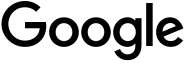
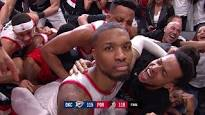
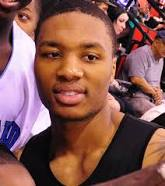
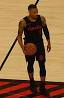
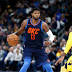
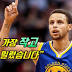

In [41]:
resp.read()     #바이트 타입.

In [43]:
from urllib import error

headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}

try:
    req = request.Request("https://www.google.com/search?q=q=%EB%8D%B0%EB%AF%B8%EC%95%88+%EB%A6%B4%EB%9D%BC%EB%93%9C",headers=headers)
    resp = request.urlopen(req)
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)
    
#한글 쓰면 에러.

In [44]:
print(resp.code,"\n\n", resp.reason,"\n\n", req.headers)

200 

 OK 

 {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}


b'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>q=\xeb\x8d\xb0\xeb\xaf\xb8\xec\x95\x88 \xeb\xa6\xb4\xeb\x9d\xbc\xeb\x93\x9c - Google \xea\xb2\x80\xec\x83\x89</title><script nonce="gznQliNyOYeIVyksyyF79w==">(function(){window.google={kEI:\'87cmXerMBJmLr7wPy7yBqAg\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_87cmXerMBJmLr7wPy7yBqAg\',kGL:\'KR\'};google.sn=\'web\';google.kHL=\'ko\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()
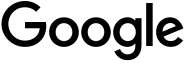
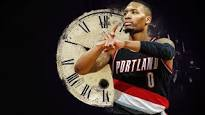
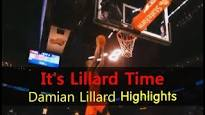
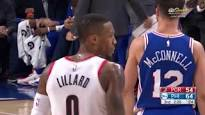

In [45]:
resp.read()

## urlparsefrom urllib import error

headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}

try:
    req = request.Request("https://www.google.com/search?q=damian+lillard ",headers=headers)
    resp = request.urlopen(req)
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)
    
#정상적으로 실행이 되었기 때문에 try/except를 건너뛰고 출력이 없다.

In [37]:
from urllib import parse

parse.urlparse('https://www.google.com/search?q=damian+lillard')
parse.urljoin('https://www.google.com/search?q=damian+lillard','/search/about')   #host부분 제외하고 뒤에를 계속 바꿔준다.
parse.urlencode({'q':'파이썬'})
parse.quote_plus('파이썬')
#parse.unquote_plus('')

'%ED%8C%8C%EC%9D%B4%EC%8D%AC'

## request (package)   : 좀 더 발전된 형태

.get 

.post 

.put 

.delete 

.head 

.options 

.response

In [46]:
import requests

In [48]:
#.get() : url, parameter(한글 써도됨..), 
# https://httpbin.org/get?key=value

requests.get("http://httpbin.org/get")
resp = requests.request("get","http://httpbin.org/get", params={"key":"value"})

In [50]:
print(resp.text)

{
  "args": {
    "key": "value"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0"
  }, 
  "origin": "163.152.3.131, 163.152.3.131", 
  "url": "https://httpbin.org/get?key=value"
}



In [66]:
rp = request.request("q", "https://www.google.com/search", params={"q":"%EB%8D%B0%EB%AF%B8%EC%95%88+%EB%A6%B4%EB%9D%BC%EB%93%9C"})
print(rp.text)

AttributeError: module 'urllib.request' has no attribute 'request'

In [67]:
requests.post("https://httpbin.org/get,)

SyntaxError: EOL while scanning string literal (<ipython-input-67-4c6fb09af305>, line 1)

In [98]:
import requests

def download(method, url, param=None, data=None):
    try:
        resp = requests.request(method, url, data=data, headers={"user-agnet":"bot"})
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print(e.response.status_code)
        print(e.response.reason)
    return resp

In [99]:
#headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
html = download("get", "https://www.google.com/search?q=릴라드")

In [100]:
html.request.headers

{'User-Agent': 'python-requests/2.21.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'user-agnet': 'bot'}

In [101]:
html.encoding="utf-8"

In [102]:
# https://www.crawler-test.com/status_codes/status_403

In [103]:
headers= None
download("get", "https://www.crawler-test.com/status_codes/status_403")

403
Forbidden


<Response [403]>

In [115]:
import time
def download(method, url, param=None, data=None):
    try:
        resp = requests.request(method, url, data=data, headers={"user-agnet":"bot"})
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= e.response.status_code < 600:    # Error 에 맞춰서 분기   # 5xx Error : Server Error :내탓 아님
            time.sleep(1)                          # 1초 기다렸다가 다시 재시도
            print("재시도")
        else:
            print(e.response.status_code)
            print(e.response.reason)
    return resp

In [116]:
download("get", "https://www.crawler-test.com/status_codes/status_500")  

재시도


<Response [500]>

In [117]:
download("get", "https://www.crawler-test.com/status_codes/status_403")

403
Forbidden


<Response [403]>

In [2]:
import time
import urllib
def download(method, url, param, data=None, timeout=1, maxretries=3):
    #param["serviceKey"] = requests.compat.unquote(param)
    try:
        resp = requests.request(method, url, params=param, data=data,  headers={"user-agent":"bot"})
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e :
        if 500 <= e.response.status_code < 600 and maxretries>0:    # Error 에 맞춰서 분기   # 5xx Error : Server Error :내탓 아님
            print(maxretries)
            time.sleep(timeout)                          # 1초 기다렸다가 다시 재시도
            resp = download(method, url, param, data, timeout, maxretries-1)
            print("재시도")
            
        else:
            print(e.response.status_code)
            print(e.response.reason)
    return resp

In [3]:
download("get", "https://www.crawler-test.com/status_codes/status_500")  

TypeError: download() missing 1 required positional argument: 'param'

In [131]:
html = download("get", "http://httpbin.org/get",{"key":"value"})

html.text     #json 형식

'{\n  "args": {}, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.21.0", \n    "User-Agnet": "bot"\n  }, \n  "origin": "163.152.3.131, 163.152.3.131", \n  "url": "https://httpbin.org/get"\n}\n'

In [132]:
import json
obj = json.loads(html.text)
obj.keys()

dict_keys(['args', 'headers', 'origin', 'url'])

In [176]:
params = {
    "serviceKey":"0xHf54NZjk%2BD7OpsxI8zeXZxG6dvyYAwdrTIDeFXP0VAb41cTIE4tCRVF%2F72q9msp3fssuvPVUCw07XC4eAJSA%3D%3D",
    "pageNo":1,
    "numOfRows":100,
    "type":"xml",
    "prhsmkNm":"고려한의원",
    "prhsmkScopeDesc":"시설전체",
    "ctprvnNm":"서울특별시",
    "signguNm":"송파구",
    "prhsmkSe":"의료기관",
    "prhsmkAppnBasis":"국민건강증진법 제9조",
    "prhsmkAr":"",
    "ffnlg":100000,
    "phoneNumber":"02-2147-3498",
    "rdnmadr":"서울특별시 송파구 새말로8길 29, 2층 (문정동)",
    "lnmadr":"",
    "institutionNm":"서울특별시 송파구청",
    "latitude":37.480060,
    "hardness":127.126940,
    "referenceDate":"2018-07-31",
    "insttCode":3230000,
    #"insttNm":"",
    "_returnType":"json"
}
params["serviceKey"]=requests.compat.unquote(params["serviceKey"])



govern = download("get", "http://api.data.go.kr/openapi/prhsmk-zn-std", params)

#http의 통신과정에서 오류
#gov_obj = json.loads(govern.text)


#안되는게 맞다.

In [177]:
govern.url

'http://api.data.go.kr/openapi/prhsmk-zn-std?serviceKey=0xHf54NZjk%2BD7OpsxI8zeXZxG6dvyYAwdrTIDeFXP0VAb41cTIE4tCRVF%2F72q9msp3fssuvPVUCw07XC4eAJSA%3D%3D&pageNo=1&numOfRows=100&type=xml&prhsmkNm=%EA%B3%A0%EB%A0%A4%ED%95%9C%EC%9D%98%EC%9B%90&prhsmkScopeDesc=%EC%8B%9C%EC%84%A4%EC%A0%84%EC%B2%B4&ctprvnNm=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&signguNm=%EC%86%A1%ED%8C%8C%EA%B5%AC&prhsmkSe=%EC%9D%98%EB%A3%8C%EA%B8%B0%EA%B4%80&prhsmkAppnBasis=%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EC%A6%9D%EC%A7%84%EB%B2%95+%EC%A0%9C9%EC%A1%B0&prhsmkAr=&ffnlg=100000&phoneNumber=02-2147-3498&rdnmadr=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C+%EC%86%A1%ED%8C%8C%EA%B5%AC+%EC%83%88%EB%A7%90%EB%A1%9C8%EA%B8%B8+29%2C+2%EC%B8%B5+%28%EB%AC%B8%EC%A0%95%EB%8F%99%29&lnmadr=&institutionNm=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C+%EC%86%A1%ED%8C%8C%EA%B5%AC%EC%B2%AD&latitude=37.48006&hardness=127.12694&referenceDate=2018-07-31&insttCode=3230000&_returnType=json'

In [171]:
govern.text

'<?xml version="1.0" encoding="UTF-8"?>\r\n<response><header><code>03</code><codeNm>NODATA_ERROR</codeNm></header></response>\r\n'

In [178]:
obj = json.loads(govern.text)
obj.keys()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

# 네이버를 털자

In [1]:
nav = download("get", "https://search.naver.com/search.naver?query=%EB%A6%B4%EB%9D%BC%EB%93%9C",{})
nav

NameError: name 'download' is not defined

In [183]:
nav.encoding="utf-8"
nav.text

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="릴라드 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'릴라드\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'릴라드\'의 네이버 통합검색 결과입니다."> <title>릴라드 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_190711.css"> <link rel="stylesheet" type="text/css" href="h

In [184]:
# 교보문고    #post 방식

In [196]:
kyobo = download("post", "http://www.kyobobook.co.kr/search/SearchCommonMain.jsp", {}, 
         data={"vPstrKeyWord":"%26%2349828%3B%26%2354532%3B%26%2347553%3B%20%26%2354532%3B%26%2347112%3B%26%2351076%3B%26%2350892%3B%26%2353356%3B","vPplace":"top"})
kyobo.encoding

'EUC-KR'

In [195]:
kyobo.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!-- header -->\n \n\n\n\n\n\n\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\n\n\n<head>\n\t<title>%26%2349828%3B%26%2354532%3B%26%2347553%3B%20%26%2354532%3B%26%2347112%3B%26%2351076%3B%26%2350892%3B%26%2353356%3B -  인터넷교보문고</title>\n<META http-equiv="Pragma" content="nocache">\n<meta http-equiv="Expires" content="0"/>\n<META http-equiv="Cache-Control" content="no-cache">\n<META http-equiv=\'Content-Type\' content=\'text/html; charset=euc-kr\'>\n<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1">\n<!--<LINK href="/common/Style.css" rel="stylesheet" type="text/css"/>-->\n<link rel="shortcut icon" href="/newimages/apps/b2c/kyobo.ICO"/>\n<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/default_ink.css" />\n<link rel="st

In [198]:
kyb = download("post","http://www.kyobobook.co.kr/search/SearchCommonMain.jsp",{},data={"vPstrCategory":"TOT","vPstrKeyWord":"spring%20framework","vPplace":"top"})
kyb.encoding

'EUC-KR'

In [199]:
kyb.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!-- header -->\n \n\n\n\n\n\n\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\n\n\n<head>\n\t<title>spring%20framework -  인터넷교보문고</title>\n<META http-equiv="Pragma" content="nocache">\n<meta http-equiv="Expires" content="0"/>\n<META http-equiv="Cache-Control" content="no-cache">\n<META http-equiv=\'Content-Type\' content=\'text/html; charset=euc-kr\'>\n<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1">\n<!--<LINK href="/common/Style.css" rel="stylesheet" type="text/css"/>-->\n<link rel="shortcut icon" href="/newimages/apps/b2c/kyobo.ICO"/>\n<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/default_ink.css" />\n<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/search.css" />\n<!--\n<link 

In [ ]:
# 뽐뿌
# 내가 보고있는 페이지와, 실제 넘어가고 있는 페이지는 차이가 있다.

## Cookies

In [200]:

#http://pythonscraping.com/pages/cookies/login.html
# 로그인 후 개발자 환경-Application-cookies
# loggedin = 1 이라는 쿠키가 심어져있다.
# HTML 의 <form> 태그가 심어져있다. <input>태그도 참고(변수는 username, password)

# URLJOIN -> urllib, requests에 있다.

requests.compat.urlparse("http://pythonscraping.com/pages/cookies/login.html")

ParseResult(scheme='http', netloc='pythonscraping.com', path='/pages/cookies/login.html', params='', query='', fragment='')

In [202]:
requests.compat.urlparse("http://pythonscraping.com/pages/cookies/login.html?id=1234")    # parameter를 알아서 잘라준다.

ParseResult(scheme='http', netloc='pythonscraping.com', path='/pages/cookies/login.html', params='', query='id=1234', fragment='')

In [203]:
#더 간편하게 쓰기 위해
requests.compat.urljoin("http://pythonscraping.com/pages/cookies/login.html","process.php")   #알아서 붙여준다.(url을 join)

'http://pythonscraping.com/pages/cookies/process.php'

## 최초접속

In [224]:
url = requests.compat.urljoin("http://pythonscraping.com/pages/cookies/login.html","welcome.php")
data = {"username":"asdfasdf","password":"password"}
pyt = download("post", url,{},data=data)
pyt.text

'\n<h2>Welcome to the Website!</h2>\nWhoops! You logged in wrong. Try again with any username, and the password "password"<br><a href="login.html">Log in here</a>'

## 세션 등록 후 접속

In [222]:
session = requests.Session()
session

In [225]:
html = session.post(url, data)
html.text

'\n<h2>Welcome to the Website!</h2>\nYou have logged in successfully! <br><a href="profile.php">Check out your profile!</a>'

In [226]:
session.cookies

<RequestsCookieJar[Cookie(version=0, name='loggedin', value='1', port=None, port_specified=False, domain='pythonscraping.com', domain_specified=False, domain_initial_dot=False, path='/pages/cookies', path_specified=False, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='username', value='asdfasdf', port=None, port_specified=False, domain='pythonscraping.com', domain_specified=False, domain_initial_dot=False, path='/pages/cookies', path_specified=False, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={}, rfc2109=False)]>

In [227]:
session = requests.Session()
session.cookies

<RequestsCookieJar[]>

In [8]:
session = requests.Session()

url = requests.compat.urljoin("http://pythonscraping.com/pages/cookies/login.html","welcome.php")
data = {"username":"qeoriuqweorwqo","password":"password"}
pyt = session.post(url,data=data)
pyt.text

'\n<h2>Welcome to the Website!</h2>\nWhoops! You logged in wrong. Try again with any username, and the password "password"<br><a href="login.html">Log in here</a>'

In [231]:
session = requests.Session()

In [237]:
#userid   # userPw  #loginprocess.do
url = "https://www.catholic.ac.kr/login.do"
url = requests.compat.urljoin(url, "https://www.catholic.ac.kr/loginprocess.do")
data = {"userid":"dvd8145","userPw":"djrud12!"}
cuk = session.post(url,data=data)
cuk

<Response [200]>

In [238]:
cuk.text

'\r\n\r\n\r\n\r\n\r\n\r\n<html>\r\n<head>\r\n\t<meta charset="utf-8">\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge"/>\r\n\t<title>가톨릭대학교</title>\r\n\t<link rel="stylesheet" type="text/css" href="/front/styles/reset.css"/>\r\n\t<script type="text/javascript" src="/front/libs/jquery-1.12.3.js"></script>\r\n\t<style type="text/css">\r\n\t\thtml{ height:100%; }\r\n\t\tbody{ height:100%; }\r\n\t\t#page{ height:100%; }\r\n\t\t#body{ height:100%; }\r\n\t\t.layout_404{ display:table; table-layout:fixed; border-collapse:collapse; width:100%; height:100%; }\r\n\t\t.layout_404{ position:absolute; top:0px; left:0px; }\r\n\t\t.layout_404 > div{ display:table-row; }\r\n\t\t.layout_404 > div > div{ display:table-cell; vertical-align:middle; text-align:center; }\r\n\t\t/**/\r\n\t\t#wrap404{ width:750px; margin:0 auto; }\r\n\t\t#wrap404 .img_404_sym{ background:url(/front/imgs/404/404_sym.png) no-repeat; width:682px; height:342px; }\r\n\t\t#wrap404 .info{ margin-top:20px; }\r\n\t\t#wrap404 

In [3]:
#userId  #userPw   #
import requests
session = requests.Session()
url = "http://builder.hufs.ac.kr/user/popupLogin.action?siteId=hufs&returnUrl=/user/indexFrame.action?framePath=div2_row_1.jsp&siteId=hufs&leftPage=&rightPage=08.html"
data = {"userId":"201401890","userPw":"1066617"}
hufs = session.post(url, data=data)
hufs

<Response [200]>

In [5]:
hufs.encoding="utf-8"
hufs.text

'\n\n<html>\n<head>\n<title></title>\n<script  type=\'text/javascript\'>\nfunction boardinit(){\n\ttry {\t\n\t\tvar scriptDomain = "hufs.ac.kr";\n\t\tif( opener ) {\n\t\t\tvar openerDomain = opener.document.domain;\n\t\t\tif( openerDomain == scriptDomain ) {\n\t\t\t\tdocument.domain = scriptDomain;\n\t\t\t}\n\t\t} else if( parent ) {\n\t\t\tvar parentDomain = parent.document.domain;\n\t\t\tif( parentDomain == scriptDomain ) {\n\t\t\t\tdocument.domain = scriptDomain;\n\t\t\t}\n\t\t} else {\n\t\t\tdocument.domain = scriptDomain;\n\t\t}\n\t} catch(e){\n\t\tdocument.domain = "hufs.ac.kr";\n\t}\n\n\t//�Ʒ� �����ϸ�..����â���� ����\n \t//document.domain="hufs.ac.kr";  //�����α���ids �� ����\u07fb��Ͽ� �ּ�������(20180612)\n\talert(\'비밀 번호가 잘못 되었습니다.\');location.href=\'http://builder.hufs.ac.kr/user/popupLogin.action?siteId=hufs&returnUrl=/user/indexFrame.action?framePath=div2_row_1.jsp&siteId=hufs&leftPage=&rightPage=08.html\';\n}\nboardinit();\n</script><noscript></noscript>\n</head>\n<body >\n

## 링크 찾기

In [ ]:
# 릴라드 검색 -> 나무위키 진입
# <a href="https://namu.wiki/w/%EB%8D%B0%EB%AF%B8%EC%95%88%20%EB%A6%B4%EB%9D%BC%EB%93%9C" 
# ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://namu.wiki/w/%25EB%258D%25B0%25EB%25AF%25B8%25EC%2595%2588%2520%25EB%25A6%25B4%25EB%259D%25BC%25EB%2593%259C&
# amp;ved=2ahUKEwjsu6jjtqzjAhVIQLwKHfqxAjQQFjAAegQIAxAB">
# <h3 class="LC20lb">데미안 릴라드 - 나무위키</h3><br>
# <div class="TbwUpd">
# <cite class="iUh30">https://namu.wiki/w/데미안%20릴라드</cite>
# </div>
# </a>

<a href="https://namu.wiki/w/%EB%8D%B0%EB%AF%B8%EC%95%88%20%EB%A6%B4%EB%9D%BC%EB%93%9C" 
ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=
https://namu.wiki/w/%25EB%258D%25B0%25EB%25AF%25B8%25EC%2595%2588%2520%25EB%25A6%25B4%25EB%259D%25BC%25EB%2593%259C&
    amp;ved=2ahUKEwi-1vj5zqzjAhUF7rwKHSgbDPgQFjAAegQIARAB">
<h3 class="LC20lb">데미안 릴라드 - 나무위키</h3>
<br><div class="TbwUpd">
<cite class="iUh30">https://namu.wiki/w/데미안%20릴라드</cite>
    </div>
    </a>



# 숙제
## 1. 구글 검색결과 (1번) 
## 2. 검색결과-이름